# Bundesliga Analyse

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [24]:


# Path to the Excel file
excel_path = '/Users/youri/VSC Data/Data Analytics/Fussballdaten/Bundesliga/Bundesliga_Bereinigt.xlsx'  # Update this to your Excel file path

# Read the Excel file
df = pd.read_excel(excel_path)

# Path where you want to save the CSV file
csv_path = '/Users/youri/VSC Data/Data Analytics/Fussballdaten/Bundesliga/Bundesliga_Bereinigt.csv'  # Update this to your desired CSV file path

# Write the DataFrame to a CSV file
df.to_csv(csv_path, index=False)


## Daten Importieren

In [31]:
file_path = '/Users/youri/VSC Data/Data Analytics/Fussballdaten/Bundesliga/Bundesliga_Bereinigt.csv'
df = pd.read_csv(file_path)


# Anzeigen der ersten paar Zeilen der Tabelle zur Überprüfung
df.head(10)

,League,Saison,Spieltag,hometeam_raw,awayteam_raw,final_score_raw,goal_raw,goal_time_raw,extratime_raw
0,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:1,52.0,no
1,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,2:0,47.0,no
2,Bundesliga,2014/2015,1,FC Bayern München,VfL Wolfsburg,2:1,1:0,38.0,no
3,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,2:0,35.0,no
4,Bundesliga,2014/2015,1,1899 Hoffenheim,FC Augsburg,2:0,1:0,33.0,no
5,Bundesliga,2014/2015,1,Eintracht Frankfurt,SC Freiburg,1:0,1:0,15.0,no
6,Bundesliga,2014/2015,1,Hannover 96,FC Schalke 04,2:1,2:1,70.0,no
7,Bundesliga,2014/2015,1,Hannover 96,FC Schalke 04,2:1,1:1,67.0,no
8,Bundesliga,2014/2015,1,Hannover 96,FC Schalke 04,2:1,0:1,47.0,no
9,Bundesliga,2014/2015,1,Hertha BSC,SV Werder Bremen,2:2,2:2,55.0,no


In [26]:


# Analyse der Torverteilung über die Spielzeit in verschiedenen Saisons
goal_distribution = df.groupby(['Saison', 'goal_time_raw']).size().unstack(fill_value=0)

# Anzeigen der Torverteilung
print(goal_distribution)

goal_time_raw  1.0    2.0    3.0    4.0    5.0    6.0    7.0    8.0    9.0    \
Saison                                                                         
2014/2015          6      2      9      6      3      3      5     11      6   
2015/2016          2      2      4      5      8      4      6      2      9   
2016/2017          1      6      7     12      8     10      3      4      6   
2017/2018          5      5      3      9     10      5      5      6      9   
2018/2019          9      4      7      7      4      5      8      7      7   
2019/2020          8      5      7      6      4     12     10      8     11   
2020/2021          2      5      8      5      8      7     10      6     10   
2021/2022          3      3     11      6     10      7     10      7      8   
2022/2023          4      8      6     10     10     11      7      9      8   

goal_time_raw  10.0   ...  92.0   93.0   94.0   95.0   96.0   97.0   98.0   \
Saison                ...                

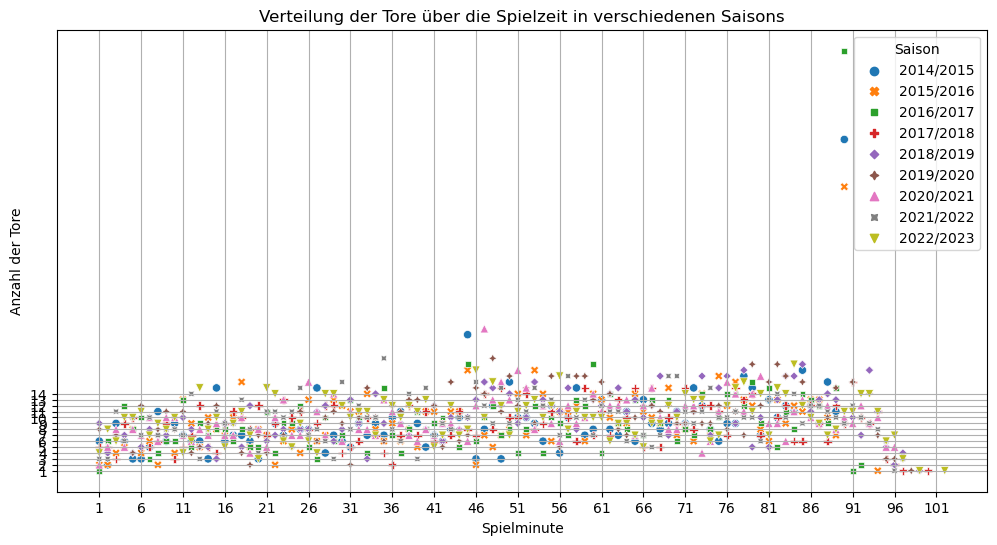

In [27]:
# Vorbereitung der Daten für das Scatterplot
scatter_data = df.groupby(['Saison', 'goal_time_raw']).size().reset_index(name='goals')

# Erstellen des Scatterplots
plt.figure(figsize = (12,6))
sns.scatterplot(data=scatter_data, x='goal_time_raw', y='goals', hue='Saison', style='Saison')
plt.title('Verteilung der Tore über die Spielzeit in verschiedenen Saisons')
plt.xlabel('Spielminute')
plt.ylabel('Anzahl der Tore')
plt.xticks(range(1, 105, 5))  # Setzen der X-Achsen-Ticks alle 5 Minuten
plt.yticks(range(1, 15, 1))
plt.grid()
plt.show()

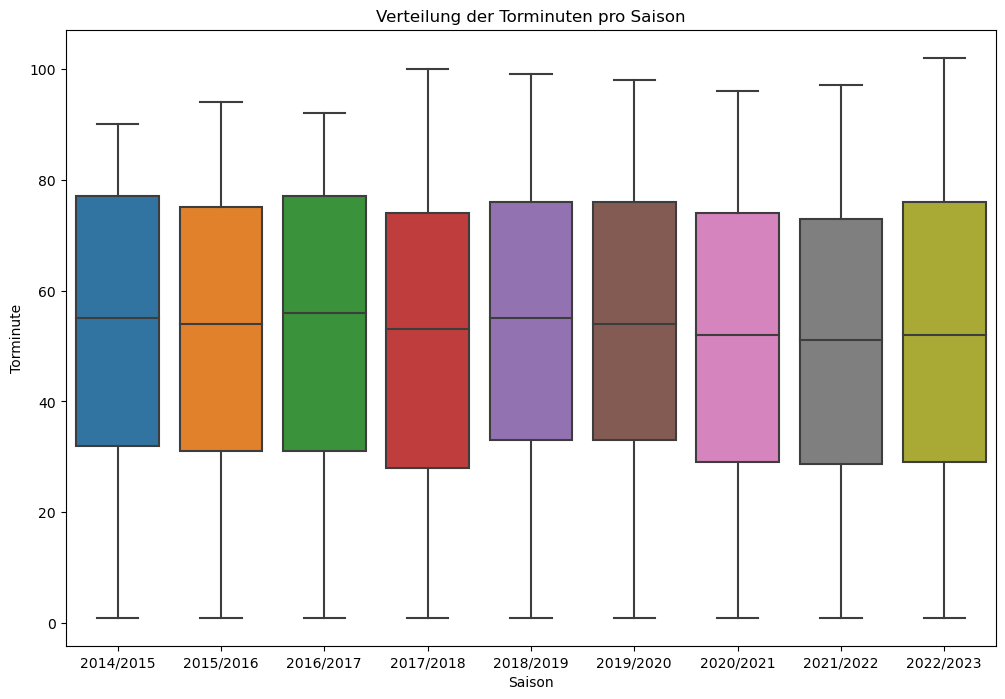

In [28]:
# Erstellen der Boxplots für jede Saison
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Saison', y='goal_time_raw')
plt.title('Verteilung der Torminuten pro Saison')
plt.xlabel('Saison')
plt.ylabel('Torminute')
plt.show()


([<matplotlib.axis.XTick at 0x1527316d0>,
 [Text(1, 0, '1'),
  Text(6, 0, '6'),
  Text(11, 0, '11'),
  Text(16, 0, '16'),
  Text(21, 0, '21'),
  Text(26, 0, '26'),
  Text(31, 0, '31'),
  Text(36, 0, '36'),
  Text(41, 0, '41'),
  Text(46, 0, '46'),
  Text(51, 0, '51'),
  Text(56, 0, '56'),
  Text(61, 0, '61'),
  Text(66, 0, '66'),
  Text(71, 0, '71'),
  Text(76, 0, '76'),
  Text(81, 0, '81'),
  Text(86, 0, '86'),
  Text(91, 0, '91'),
  Text(96, 0, '96'),
  Text(101, 0, '101')])

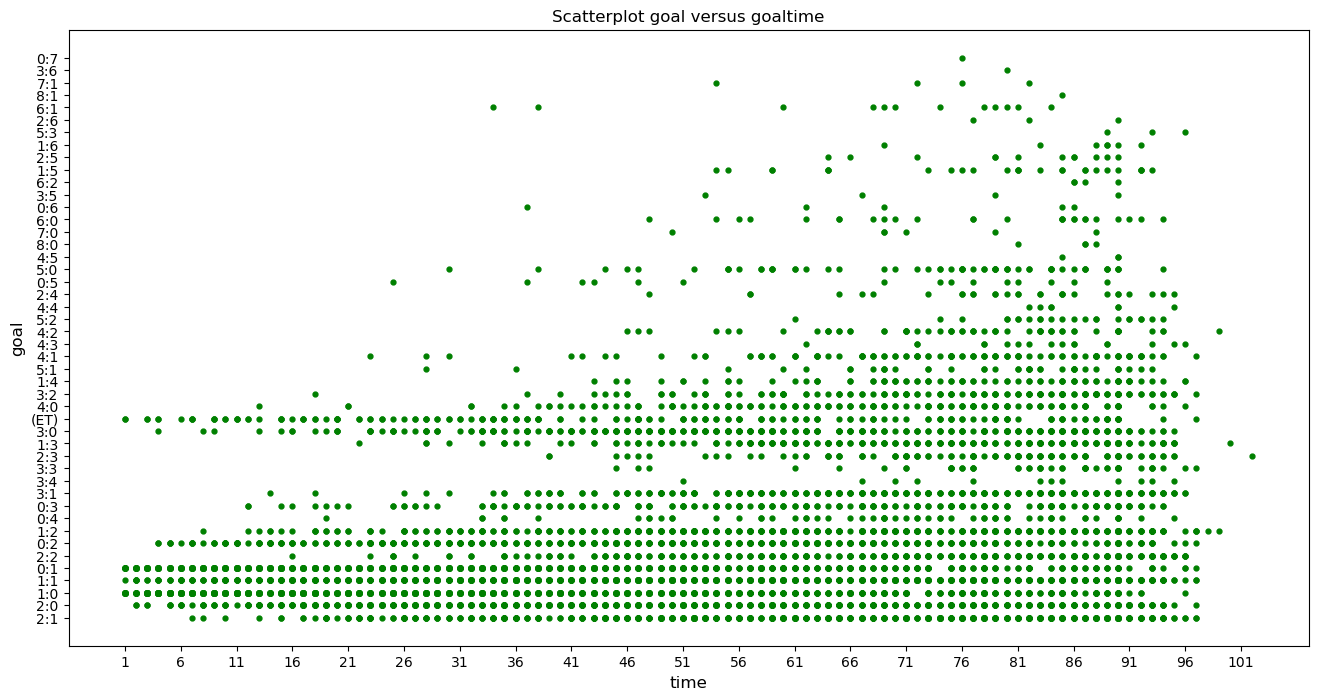

In [29]:
plt.figure(figsize=(16,8))
plt.plot(df['goal_time_raw'], 
         df['goal_raw'], 
         'o', 
         markersize=3.5,
         color="green")

# Add title and axes labels
plt.title('Scatterplot goal versus goaltime', fontsize=12)
plt.ylabel('goal', fontsize=12)
plt.xlabel('time', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xticks(range(1,102,5))

In [30]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

NameError: name 'residuals' is not defined

<Figure size 700x400 with 0 Axes>